In [ ]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 分割
from sklearn.preprocessing import LabelEncoder       # カテゴリデータ（文字列）を 数値に変換

from scipy import stats            # 平均値・標準偏差・分布の検定・p値計算など、統計関連の関数が使える
from scipy.stats import norm, skew # 平均や標準偏差を指定して正規分布の確率密度や累積分布を計算

# Jupyter Notebookの中でインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline

#学習データ(train.csv)とテストデータ(test.csv)のデータフレームへの読み込み
train = pd.read_csv('/content/house-prices_train.csv')
test = pd.read_csv('/content/house-prices_test.csv')
print("CSV読込完了")

CSV読込完了


In [ ]:
# 提出時にID列を使うため別の変数にコピーして保存
train_ID = train['Id']
test_ID = test['Id']

# 予測の時には不要なのでId列を削除する
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
print("ID列削除完了")

ID列削除完了


mu = 180921.20 and sigma = 79415.29
※muは、平均値。 sigmaは、分散値


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3119956839.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3119956839.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=norm);


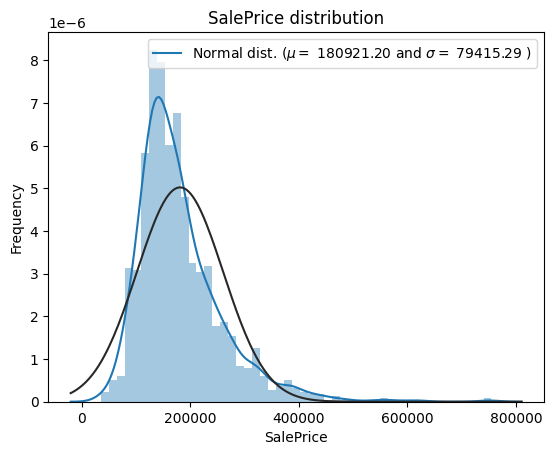

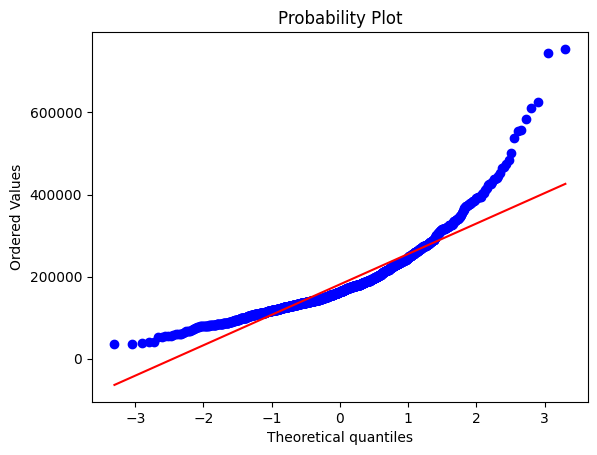

In [ ]:
# step1 SalePrice を対数変換（正規分布に近づける）

# SalePriceを正規分布付きヒストグラムを描画する（青線）
sns.distplot(train['SalePrice'] , fit=norm);
    # fit=norm：正規分布 を仮定して、データに最も合う平均（μ）と標準偏差（σ）を使った曲線を描く


# MLE(Maximum Likelihood Estimate)を用いて正規分布を推定する（黒線）
(mu, sigma) = norm.fit(train['SalePrice'])
    # norm.fit：最尤法（MLE）を使ってデータに最適な正規分布のパラメータを推定
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))  # {:.2f}は小数点以下2桁まで表示
print('※muは、平均値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    # 凡例（Legend）、Normal dist：正規分布
    # $...$ の中に書くと LaTeX数式 として描画され、「μ」「σ」の記号を表示できる
    # loc='best'は邪魔にならない位置 に自動配置

plt.ylabel('Frequency') # Frequency（度数）。棒グラフの高さ
plt.title('SalePrice distribution') # 売上価格の分布


# QQプロットの描画（下の方の図）
    # △正規QQプロットとは、観測値が正規分布に従う場合の期待値をY軸にとり、観測値そのものをX軸にとった確率プロット。
    # 観測データ（学習データの住宅価格）が理論的な正規分布（赤線）に従うかを確認する手法。
    # データが完全に正規分布に従っていれば点（青）はほぼ直線に並ぶ
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
    # stats.probplot は 確率プロット を作成する関数。train['SalePrice'] の値を正規分布の理論値と比較して描画
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-284514235.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-284514235.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=norm);


mu = 12.02 and sigma = 0.40
※muは、中央値。 sigmaは、分散値


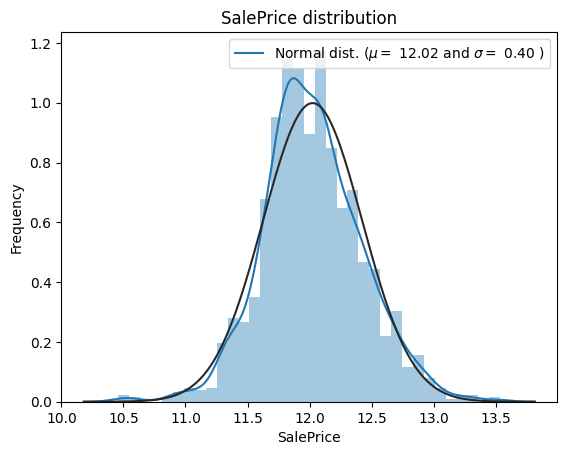

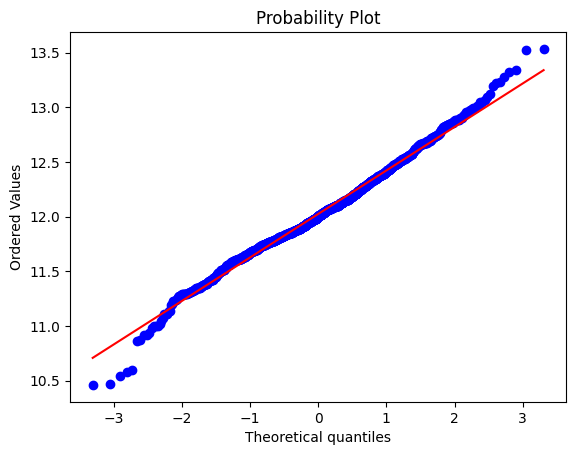

In [ ]:
# SalePriceは正規分布ではなかったため、正規分布にする
# SalePriceをlog(1+x)　で対数に変換する
train["SalePrice"] = np.log1p(train["SalePrice"])

# 正規分布付きヒストグラムを描画して確認
sns.distplot(train['SalePrice'] , fit=norm);

# MLE(Maximum Likelihood Estimate)を用いて分布を正規推定する（↑以下、同上）
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print('※muは、中央値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 再度QQプロットを描画する
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
# step1　SalePrice を対数変換（正規分布に近づける）おわり

In [ ]:
# step2　2つのCSV結合結合

# 学習データとテストデータの行数を取得
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [ ]:
# 学習データとテストデータを結合(all_data)
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True) # reset_index(drop=True)：インデックスを振り直す
all_data.drop(['SalePrice'], axis=1, inplace=True)
  # ※ここで、SalesPriceをy_trainに入れ、結合データからは消しておく

# 結合後の列と行数
print(all_data.shape)

(2919, 79)


In [ ]:
# step2 2つのCSV結合結合

In [ ]:
# step3 欠損値処理

# 結合データの列ごとの欠損数
all_data_na = all_data.isnull().sum()

# 欠損がある列だけ抽出
all_data_na = all_data_na[all_data_na > 0]             # 欠損がある列だけ抽出
all_data_na = all_data_na.sort_values(ascending=False) # 欠損数が多い順にソート

print(all_data_na)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64


In [ ]:
# 1) 「NA：なし」なので「0」で埋めるカテゴリ変数15個
none_cols = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature",
             "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
             "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond",
             "MasVnrType"]
for col in none_cols:
    all_data[col] = all_data[col].fillna(0)

# Alley　　　: 路地へのアクセスの種類 「NA：路地アクセスなし」 tr1369 te1532
# FireplaceQu: 暖炉の品質             「NA：暖炉なし」         tr690 te730
# PoolQC     : プールの品質           「NA：プールなし」       tr1453 te1456
# Fence      : フェンスの品質         「NA：フェンスなし」     tr1179 te1169
# MiscFeature: その他の機能の値       「NA：なし」             tr1406 te1408

# BsmtQual   : 地下室の高さ            「NA：地下室なし」      tr37 te44
# BsmtCond   : 地下室の一般的な状態    「NA：地下室なし」      tr37 te45
# BsmtExposure: ウォークアウトまたはガーデンレベル壁 「NA：地下室なし」tr38 te44
# BsmtFinType1: 地下室仕上げエリア    「NA：地下室なし」       tr37 te42
# BsmtFinType2: 地下室仕上げエリア    「NA：地下室なし」       tr38 te42

# GarageType  ：ガレージの場所    　  「NA：ガレージなし」     tr81 te76
# GarageYrBlt ：ガレージが建てられた年「NA：ガレージなし」     tr81 te78
# GarageFinish：ガレージの内装仕上げ  「NA：ガレージなし」     tr81 te78
# GarageQual  ：ガレージ品質　　      「NA：ガレージなし」     tr81 te78
# GarageCond   : ガレージの状態　     「NA：ガレージなし」     tr81 te78

# MasVnrType ：石積みベニア 「None：なし」の項目あり。 tr(None864,NA8) te（None878、NA16）


In [ ]:
# 2) 数値変数で0で埋める列
zero_cols = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
           #  'BsmtFullBath','BsmtHalfBath',
             'GarageCars','GarageArea']
for col in zero_cols:
    all_data[col] = all_data[col].fillna(0)

# MasVnrArea ：石積みベニヤ面積、       tr8  te15。
# BsmtFinSF1 : タイプ1の仕上げ済み面積  te1
# BsmtFinSF2 : タイプ2完成面積          te1
# BsmtUnfSF  : 地下室未完成面積         te1
# TotalBsmtSF: 地下室総面積             te1

# GarageCars : 車の収容能力におけるガレージのサイズ   te1
# GarageArea : ガレージの面積           te1



In [ ]:
# 3) 最頻値（mode）で埋めるカテゴリ変数 7個
mode_cols = ['MSZoning','Exterior1st','Exterior2nd','Electrical', 'BsmtFullBath',
             'BsmtHalfBath', 'KitchenQual', 'Functional','SaleType']
for col in mode_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# MSZoning    ：販売の一般的な種類。   te4
# Exterior1st ：外装。                 te1
# Exterior2nd ：家の外装材　　         te1
# Electrical  ：電気系統。　　         tr1
# BsmtFullBath：地下のフルバスルーム   te2

# BsmtHalfBath：地下の半分のバスルーム te2
# KitchenQual ：キッチンの品質。       te1
# Functional  ：住宅の機能。           te2
# SaleType    ：販売タイプ             te1

In [ ]:
# 4) 特殊ケース：LotFrontageはNeighborhood近隣地域ごとの中央値で補完
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
# LotFrontage：敷地に接する道路の長さ。　tr259  te227

# 5) 削除する列（NA以外はすべて「AllPub」なので除去）
all_data = all_data.drop(['Utilities'], axis=1)
# Utilities：利用可能な公共設備の種類のタイプ。 　te2


In [ ]:
# 欠損値が残ってないか確認
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'欠損比率': all_data_na})
print(missing_data)


Empty DataFrame
Columns: [欠損比率]
Index: []


In [ ]:
# Step3  欠損値処理おわり


In [ ]:
# Step4　数値型データを正規分布に近づける（線形回帰モデルの精度を上げるため）

# 1) 地下室の面積(TotalBsmtSF)と1階のフロアの面積(1stFlrSF)と2階のフロアの面積(2ndFlrSF)を組み合わせて、
# 家全体の面積(TotalSF)を作成
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print("家全体の面積作成終了")


家全体の面積作成終了


In [ ]:
# 数値型特徴量の歪度を確認
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# 右に偏っているもの（正の歪度）が大きい順に並べる
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})

print("数値型変数の歪度トップ10:")
print(skewness.head(10))

数値型変数の歪度トップ10:
                    Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594


In [ ]:
# 歪んでいる数値データを、Box-Cox変換で正規分布に近づける

# 歪度）の 絶対値が 0.75 より大きいものだけを残す
skewness = skewness[abs(skewness) > 0.75]
print(f"歪度が0.75より大きい特徴量は {skewness.shape[0]} 個あります:")

# 歪んだ列すべてに Box-Cox 変換を適用し、正規分布っぽく変換
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)


歪度が0.75より大きい特徴量は 37 個あります:


In [ ]:
# Box-Cox変換後の歪度を再確認
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats_post = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewness_post = pd.DataFrame({'Skew': skewed_feats_post})

# 歪度トップ10を表示
print("Box-Cox変換後の数値型変数の歪度トップ10:")
print(skewness_post.sort_values(by='Skew', ascending=False).head(10))

# 歪度がまだ大きいもの（例えば絶対値 > 0.75）を確認
skewness_post_large = skewness_post[abs(skewness_post['Skew']) > 0.75]
print(f"Box-Cox変換後でも歪度が0.75より大きい特徴量は {skewness_post_large.shape[0]} 個あります:")

Box-Cox変換後の数値型変数の歪度トップ10:
                    Skew
PoolArea       15.119426
3SsnPorch       8.924822
LowQualFinSF    8.744143
MiscVal         5.597060
BsmtHalfBath    3.788243
KitchenAbvGr    3.698825
ScreenPorch     2.978396
BsmtFinSF2      2.564481
EnclosedPorch   2.025461
MasVnrArea      0.636361
Box-Cox変換後でも歪度が0.75より大きい特徴量は 15 個あります:


In [ ]:
# Step4　数値型データを正規分布に近づける　おわり

In [ ]:
# Step5 カテゴリ変数のダミー変数化(文字列を数値へ変換)

# データタイプの確認
pd.set_option('display.max_rows', None)     # 行を省略せず全表示
pd.set_option('display.max_columns', None)  # 列を省略せず全表示
print(all_data.dtypes)

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object


In [ ]:
# カテゴリ変数のダミー変数化（objectを bool 型に変換）
all_data = pd.get_dummies(all_data)
print("ダミー変数化後のデータ形状:", all_data.shape)

ダミー変数化後のデータ形状: (2919, 301)


In [ ]:
# Step5 カテゴリ変数のダミー変数化　おわり

In [ ]:
# Step6
# 学習データ・テストデータに分割
X_train = all_data[:len(train)]
X_test  = all_data[len(train):]

# 列が一致しているか確認
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0  # テストデータにない列を 0 で埋める

X_test = X_test[X_train.columns]  # 列順を揃える

# これで NaN は基本的に消える
print(X_test.isnull().sum().sum())  # 0 ならOK

0


In [ ]:
# Step7 価格に影響する特徴量の取得

# ランダムフォレストをインポート
from sklearn.ensemble import RandomForestRegressor

# 学習して、どの特徴量が価格に影響しているかを確認
rf = RandomForestRegressor(n_estimators=80, max_features='sqrt', random_state=0)
    # 80本の決定木。max_features='sqrt' で決定木ごとに 特徴量の平方根の数だけランダムに使う

rf.fit(X_train, y_train)
print("Random Forestの学習が終わりました")

Random Forestの学習が終わりました


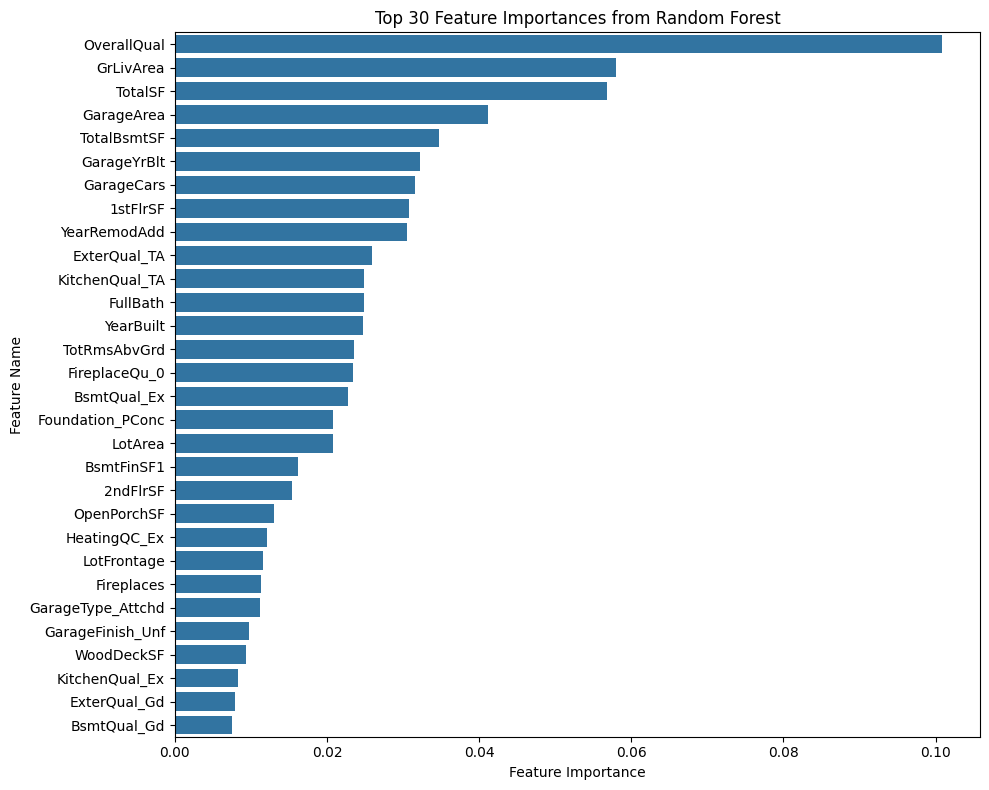

In [ ]:
# 各特徴量の重要度を取得
feature_importances = rf.feature_importances_

# 重要度ランキング作成
ranking = np.argsort(-rf.feature_importances_)

# 重要度が高い上位30個を出力（住宅価格に影響が高いもの使用して学習する）
top_features = X_train.columns[ranking[:30]]
top_importances = feature_importances[ranking[:30]]

plt.figure(figsize=(10,8))
sns.barplot(x=top_importances, y=top_features, orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 30 Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
# 上位2個を掛け合わせ、新しい特徴量'Interaction'を作成
X_train["Interaction"] = X_train["TotalSF"] * X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"] * X_test["OverallQual"]

print("新しい特徴量'Interaction'の作成完了")

新しい特徴量'Interaction'の作成完了


/tmp/ipython-input-2863182698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Interaction"] = X_train["TotalSF"] * X_train["OverallQual"]


In [ ]:
# Step7 価格に影響する特徴量の取得　おわり

In [ ]:
# Step8 学習データとSalePriceとの相関係数を確認し、住宅価格と相関が高いものの欠損を処理する

# 3-5の処理が終わった結合データall_dataを、X_trainデータとX_testデータに分割（学習は、学習データだけでやるため）
X_train = all_data.iloc[:train.shape[0], :].copy() # X_train：結合していたのを分けた学習データ
X_test  = all_data.iloc[train.shape[0]:, :].copy() # X_test：結合していたのを分けたテストデータ

# 目的変数SalePriceを  y_trainという変数に戻す(y_train:住宅価格)
y_train = train['SalePrice'] #ステップ2で、CSVに入っていたSalesPriceをy_trainに入れ、結合データからは削除していた

# train_tmp（学習データのコピー） に SalePrice を結合
train_tmp = X_train.copy() # train_tmp：X_trainをコピーしたもの（外れ値除去や相関確認用）
train_tmp['SalePrice'] = y_train

print("前処理が終わった全データをX_trainデータとX_testデータに分割。X_trainデータにSalePrice結合完了")

前処理が終わった全データをX_trainデータとX_testデータに分割。X_trainデータにSalePrice結合完了


In [ ]:
# 学習データ（CSV）と、SalePriceとの相関係数を確認
corrmat = train.select_dtypes(include=['number']).corr() # 数値データだけ抽出して相関係数表を作る

# SalePriceとの相関が高い順に並べ、インデックスを作る
order = corrmat["SalePrice"].sort_values(ascending=False).index

# その順番で表示
sorted_corr = corrmat.loc[order, order]
sorted_corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,TotRmsAbvGrd,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,2ndFlrSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,OverallCond,YrSold,LowQualFinSF,MSSubClass,KitchenAbvGr,EnclosedPorch
SalePrice,1.000000,0.817185,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608,0.541073,0.534422,0.489450,0.430809,0.372023,0.355879,0.334135,0.321053,0.319300,0.313982,0.257320,0.236224,0.221985,0.209043,0.121208,0.069798,0.057330,0.054900,0.004832,-0.005149,-0.020021,-0.036868,-0.037263,-0.037963,-0.073959,-0.147548,-0.149050
OverallQual,0.817185,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.547766,0.427452,0.396765,0.411876,0.239666,0.251646,0.238923,0.308819,0.295493,0.273458,0.105806,0.111098,0.308159,0.101676,0.064886,0.065166,0.070815,0.030371,-0.059119,-0.040150,-0.031406,-0.091932,-0.027347,-0.030429,0.032628,-0.183882,-0.113937
GrLivArea,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389,0.231197,0.825489,0.461679,0.390857,0.208171,0.402797,0.247433,0.330224,0.687501,0.415772,0.263116,0.034836,0.240257,0.521270,0.101510,0.170205,0.050240,0.020643,-0.009640,-0.018918,-0.002416,-0.079686,-0.036526,0.134683,0.074853,0.100063,0.009113
GarageCars,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.588920,0.362289,0.300789,0.364204,0.224054,0.285691,0.226342,0.213569,0.183926,0.219178,0.154871,0.131881,0.214175,0.086106,0.050494,0.020934,0.040522,0.035765,-0.038264,-0.020891,-0.043080,-0.185758,-0.039117,-0.094480,-0.040110,-0.050634,-0.151434
GarageArea,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.564567,0.337822,0.269141,0.373066,0.296970,0.344997,0.224666,0.241435,0.138347,0.163549,0.180403,0.179189,0.183303,0.065253,0.051412,0.061047,0.027974,0.035087,-0.018227,-0.024536,-0.027400,-0.151521,-0.027378,-0.067601,-0.098672,-0.064433,-0.121777
TotalBsmtSF,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.322445,0.285573,0.339519,0.363936,0.522396,0.392075,0.232019,0.247264,-0.174512,-0.048804,0.260833,0.307351,0.415360,0.050450,0.084489,0.126053,0.013196,0.037384,0.104810,-0.000315,-0.018479,-0.171098,-0.014969,-0.033245,-0.238518,-0.068901,-0.095478
1stFlrSF,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.233449,0.409516,0.410531,0.344501,0.445863,0.457181,0.235459,0.211671,-0.202646,-0.119916,0.299475,0.244671,0.317987,0.127401,0.088758,0.131525,0.031372,0.056104,0.097117,0.001956,-0.021096,-0.144203,-0.013604,-0.014241,-0.251758,0.068101,-0.065292
FullBath,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.484557,0.554784,0.243671,0.276833,0.058543,0.198769,0.187703,0.259977,0.421378,0.136381,0.126031,-0.064512,0.288886,0.363252,-0.008106,0.049604,0.055872,0.035353,-0.076444,-0.054536,-0.014290,-0.194149,-0.019669,-0.000710,0.131608,0.133115,-0.115093
YearBuilt,0.586570,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.825667,0.095589,0.147716,0.315707,0.249503,0.123349,0.224880,0.188686,0.010308,0.242656,0.014228,0.187599,0.149040,-0.070651,-0.050364,0.004950,0.012398,0.031355,-0.049107,-0.038162,-0.034383,-0.375983,-0.013618,-0.183784,0.027850,-0.174800,-0.387268
YearRemodAdd,0.565608,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.642277,0.191740,0.112581,0.179618,0.128451,0.088866,0.205726,0.226298,0.140024,0.183331,0.013788,0.119470,0.181133,-0.040581,-0.038740,0.005829,0.021490,0.045286,-0.067759,-0.012337,-0.010286,0.073741,0.035743,-0.062419,0.040581,-0.149598,-0.193919


/tmp/ipython-input-3711065647.py:16: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3711065647.py:16: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3711065647.py:16: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3711065647.py:16: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

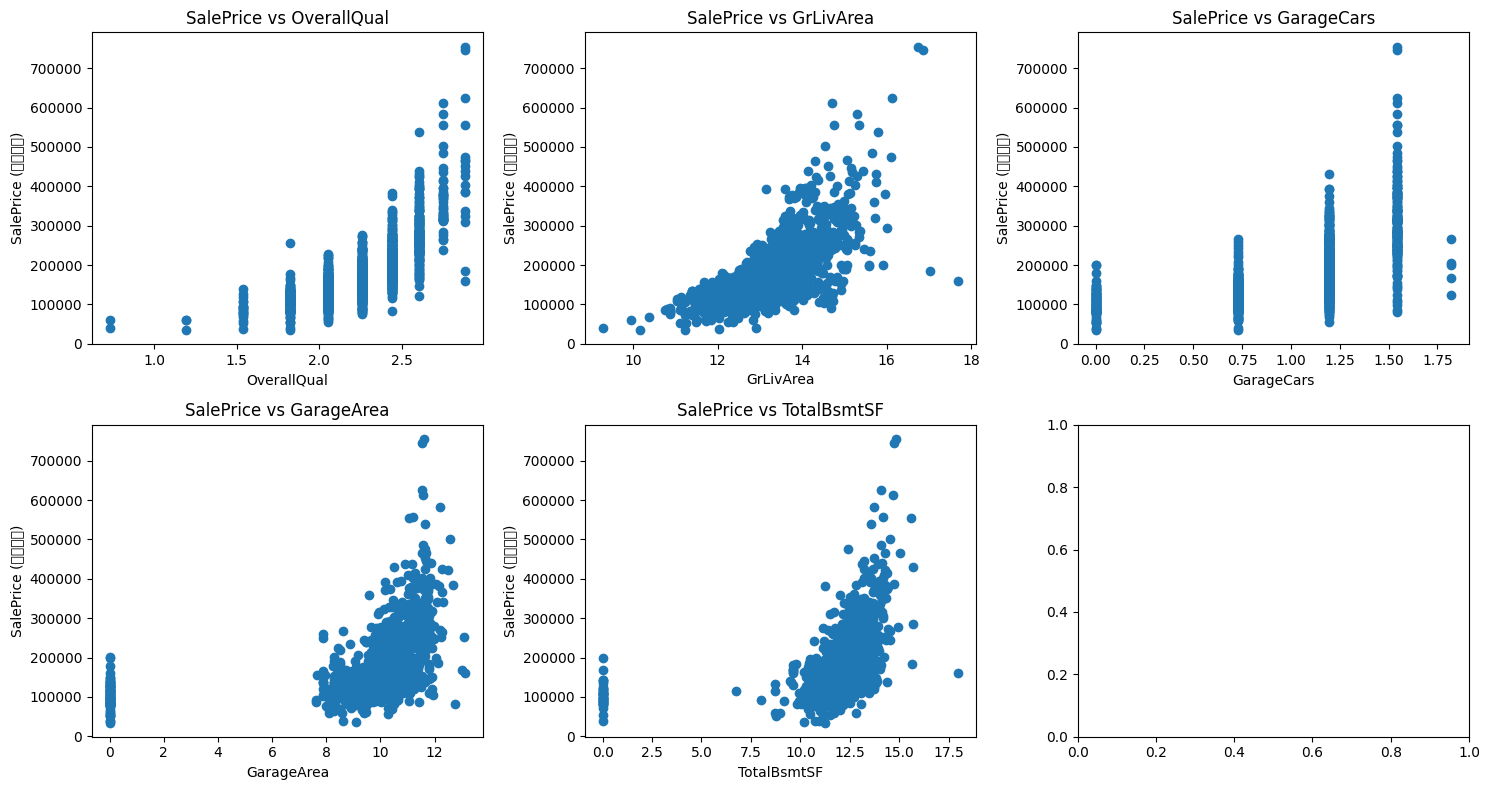

In [ ]:
# 住宅価格と相関が高そうな5つ(相関関係0.6以上)をグラフで確認
cols = ["OverallQual", "GrLivArea",  "GarageCars", "GarageArea", "TotalBsmtSF"]

# log変換されている SalePrice を元の値に戻す
y_train_original = np.exp(y_train)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.scatter(X_train[col], y_train_original)
    ax.set_xlabel(col)
    ax.set_ylabel("SalePrice (元の価格)")
    ax.set_title(f"SalePrice vs {col}")

plt.tight_layout()
plt.show()

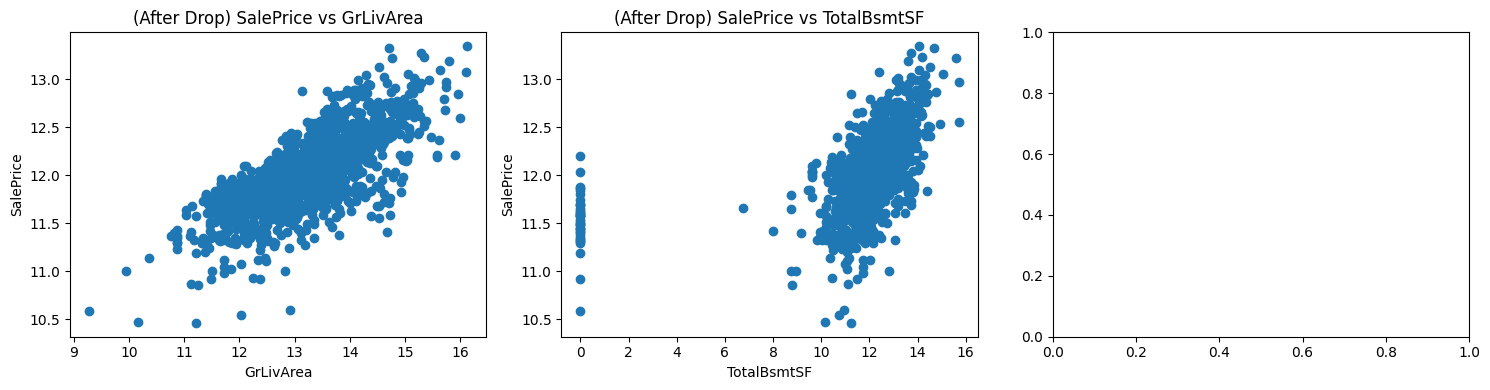

In [ ]:
# 代表的な外れ値の除去
Xmat = X_train.copy() # 3-5の処理が終わっているものをコピー
Xmat['SalePrice'] = y_train # 住宅価格結合

Xmat = Xmat.drop(index=Xmat[(Xmat['GrLivArea'] > 16.5) & (Xmat['SalePrice'] < 30000)].index)
Xmat = Xmat.drop(index=Xmat[(Xmat['TotalBsmtSF'] > 17.5) & (Xmat['SalePrice'] < 20000)].index)

# X_train と y_train も外れ値削除を反映させる
X_train = Xmat.drop("SalePrice", axis=1)
y_train = Xmat["SalePrice"]

# 再度グラフ確認
cols2 = [ "GrLivArea",  "TotalBsmtSF"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()

for ax, col in zip(axes, cols2):
    ax.scatter(X_train[col], y_train)
    ax.set_xlabel(col)
    ax.set_ylabel("SalePrice")
    ax.set_title(f"(After Drop) SalePrice vs {col}")

plt.tight_layout()
plt.show()


In [ ]:
# 外れ値も除去した学習データを、SalePriceとそれ以外に分割
X_train_clean = Xmat.drop('SalePrice', axis=1) # この時点で3-6前処理終わっっている
y_train_clean = Xmat['SalePrice']

print(X_train_clean.shape, y_train_clean.shape)

(1456, 301) (1456,)


In [ ]:
# Step8 学習データとSalePriceとの相関係数を確認し、住宅価格と相関が高いものの欠損を処理する　おわり

In [ ]:
# Step9　 2-6前処理した学習データをさらにtrain / validation に分割（モデル評価用）
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=0
)
print(X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape)

(1164, 301) (292, 301) (1164,) (292,)


In [ ]:
# Step10 標準化して外れ値除去（詳細版）
X_train_top = X_train[top_features]  # X_train：3-5前処理が終わってX_trainデータとX_testデータに分割したときのもの
# (値 - 平均) / 標準偏差
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

print("標準化完了")


標準化完了


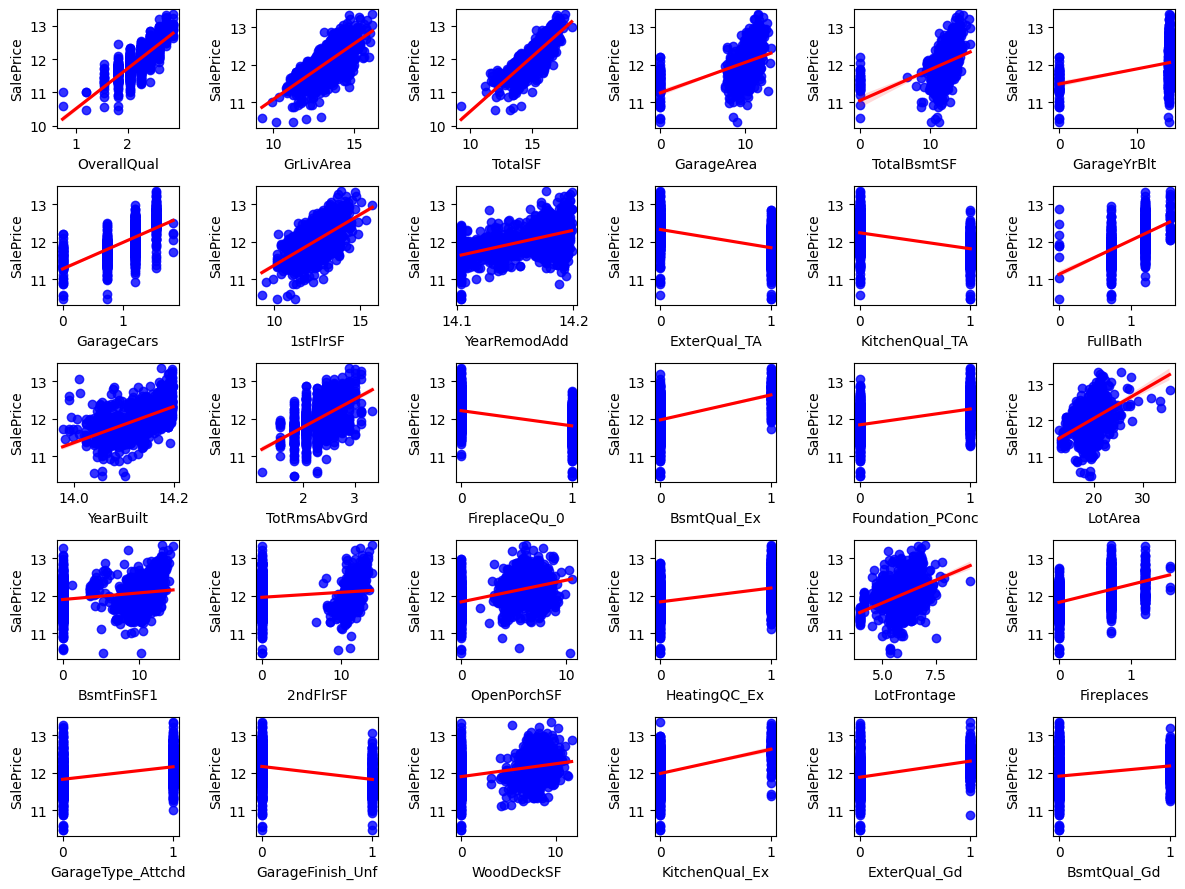

In [ ]:
# SalePriceと、標準化した各特徴量の関係を調べる
fig = plt.figure(figsize=(12,9))

for i, col in enumerate(X_train_top.columns):  # 特徴量ランキング順
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train_top[col], y=y_train,
                scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.tight_layout() # ラベルが重ならないように調整
plt.show()

In [ ]:
# Step10 標準化して外れ値除去（詳細版）おわり

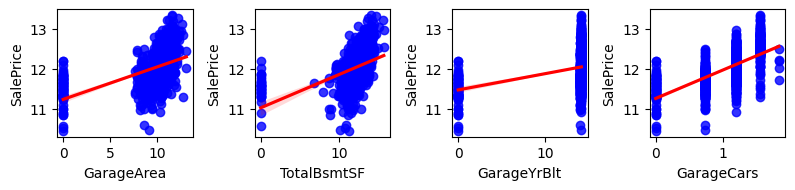

GarageArea    -3.039741
TotalBsmtSF   -4.172311
GarageYrBlt   -3.876502
GarageCars    -1.205954
dtype: float64


In [ ]:
# Step11 歪度の確認
#（極端に外れ値がある列や 0 がある場合は、Step4で調整できていないかもしれないので、外れ値除去した後で再確認）

# 数値連続変数のみ を対象にする  (# X_train_clean: 3-6前処理した後のSalePriceと分割したデータ)
numeric_feats = X_train_clean.select_dtypes(include=[np.number]).columns
#numeric_feats = [f for f in numeric_feats if 'MSZoning' not in f and 'Neighborhood' not in f and 'Street' not in f]

# 歪度を計算
skewed_feats = X_train_clean[numeric_feats].apply(lambda x: skew(x.dropna()))

# 歪度が大きいもの（例：0.75以上）だけ抽出
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]

# 重要度順の top_features と照合し、重要度も考慮した順にソート
# skewed_feats.index は歪度が大きい特徴量のリスト
skewed_top_features = [f for f in top_features if f in skewed_feats.index]

# Step5: 可視化
fig = plt.figure(figsize=(12,9))
for i, col in enumerate(skewed_top_features):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train_top[col], y=y_train,
                scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.tight_layout()
plt.show()

# 歪度の大きい特徴量とその値も確認
print(skewed_feats[skewed_top_features])


In [ ]:
# Step12 分割する（外れ値除去や特徴量作成を反映しているため）
ytrain = Xmat['SalePrice']
Xtrain = Xmat.drop(['SalePrice'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=0)

print(X_train.shape,X_val.shape, y_train.shape, y_val.shape)

(1164, 301) (292, 301) (1164,) (292,)


In [ ]:
# Step13 モデル学習
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # StandardScalerをインポート
import pandas as pd # pandasがインポートされていることを確認
import numpy as np # numpyがインポートされていることを確認

# 最終的な予測に使用するテストデータを取得
# このデータは、ダミー変数化 (Step 5) までの前処理は完了しているが、標準化はまだ行われていない状態です。
X_test_for_prediction = all_data.iloc[train.shape[0]:, :].copy()

# StandardScalerを初期化
scaler = StandardScaler()

# 訓練データ（X_train）でスケーラーをフィットさせ、X_train、X_val、X_test_for_predictionを変換します。
# X_trainとX_valは、cell 3fKq4a117S2Hで`X_train_clean`から分割されたデータです。
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_for_prediction_scaled = scaler.transform(X_test_for_prediction)

# DataFrameに戻して列名とインデックスを保持します
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_for_prediction_scaled = pd.DataFrame(X_test_for_prediction_scaled, columns=X_test_for_prediction.columns, index=X_test_for_prediction.index)

# 線形回帰モデルの学習
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Step14 予測（評価用X_valで住宅価格を予測）
y_pred = model.predict(X_val_scaled)

# 評価指標（RMSE (二乗平均平方根誤差）を出力する関数をインポート
from sklearn.metrics import mean_squared_error

# y_valとy_predは既にlog1p変換された値なので、このRMSEは対数スケールでの値です。
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_log = np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred)))

print("RMSE (二乗平均平方根誤差):", rmse)
print("Kaggle用 Log RMSE:", rmse_log)



RMSE (二乗平均平方根誤差): 0.11157493102187592
Kaggle用 Log RMSE: 0.009354554368021444


In [ ]:
# 学習結果の傾きと切片を算出
print('傾き：{0}'.format(model.coef_[0]))
print('y切片: {0}'.format(model.intercept_))

傾き：0.00844831349023662
y切片: 12.016376117238218


In [ ]:
# 学習結果の傾きと切片を算出
print('傾き：{0}'.format(model.coef_[0]))
print('y切片: {0}'.format(model.intercept_))

# 学習済みのモデルから予測した結果をセット
# 係数確認
# 係数表示のために、スケーリングされた訓練データを使用します。
for feat, coef in zip(X_train_scaled.columns, model.coef_):
    print(f"{feat}: {coef}")

# logで小さくなった尺度をexpで戻す
# 新しくスケーリングされたテストデータ `X_test_for_prediction_scaled` を使用して予測します。
y_test_pred = np.exp(model.predict(X_test_for_prediction_scaled))

# 学習済みのモデルから予測した結果を出力
print(y_test_pred)

傾き：0.00844831349023662
y切片: 12.016376117238218
MSSubClass: 0.00844831349023662
LotFrontage: 0.004711410458783927
LotArea: 0.046840788920231344
OverallQual: 0.047112419877966626
OverallCond: 0.04229424351173151
YearBuilt: 0.05795870183690292
YearRemodAdd: 0.024154295656865707
MasVnrArea: 0.018036604852078024
BsmtFinSF1: 0.03380206257505384
BsmtFinSF2: 0.00048057472515660284
BsmtUnfSF: -0.007049779374714566
TotalBsmtSF: 0.0017870982224470738
1stFlrSF: -0.005873927492833542
2ndFlrSF: -0.008893333443833074
LowQualFinSF: -0.0032841229451597434
GrLivArea: 0.07077287235498601
BsmtFullBath: 0.012813951359366657
BsmtHalfBath: 0.0013350612985913307
FullBath: 0.012037955785244515
HalfBath: 0.008176759648416802
BedroomAbvGr: -0.0056367248347635075
KitchenAbvGr: -0.009021382680235068
TotRmsAbvGrd: 0.006219285227077253
Fireplaces: 0.012827109382763803
GarageYrBlt: -0.5155938774180304
GarageCars: 0.011477339820064582
GarageArea: 0.04966096425152885
WoodDeckSF: 0.012125640657008182
OpenPorchSF: 0.0067

In [ ]:
# 予測されたテストデータを、CSVファイルに
submission = pd.DataFrame({ "Id": test_ID,"SalePrice": y_test_pred})

# CSVに保存
submission.to_csv("house-prices-self2.csv", index=False)


In [ ]:
# Step1  SalePrice を対数変換（正規分布に近づける）
# step2  2つのCSV結合結合
# Step3  欠損値処理おわり
# Step4　数値型データを正規分布に近づける（Box-Coxなどで歪度調整）
# Step5 カテゴリ変数のダミー変数化

# Step6 学習データ・テストデータに分割
# Step7 価格に影響する特徴量の取得（ランダムフォレストから新しい特徴量'Interaction'取得）
# Step8 学習データとSalePriceとの相関係数を確認し、住宅価格と相関が高いものの代表的外れ値を処理する
# Step9 前処理した学習データをさらにtrain / validation に分割（モデル評価用）
# Step10 標準化して外れ値除去（詳細版）

# Step11 歪度の再確認
# Step12 分割する（外れ値除去や特徴量作成を反映しているため）
# Step13 モデル学習
# Step14 線形回帰モデルで予測